In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import src.basic_function_cap as bfc
import src.piano_key_notes as pkn
import src.sheet_reader as sr
import ipywidgets as widgets
from ipywidgets import interact

# Crop video

In [2]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')

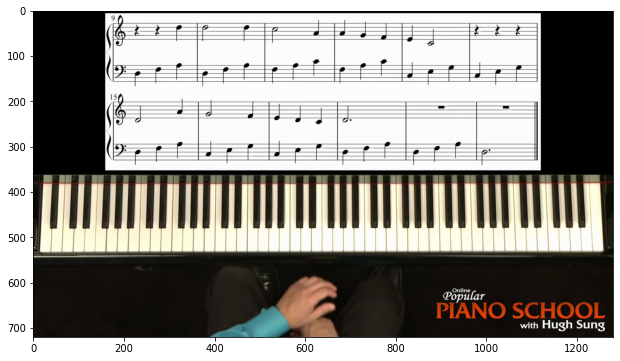

In [3]:
bfc.show_frame(cap, 814)
_, frame = bfc.get_frame(cap, 814)

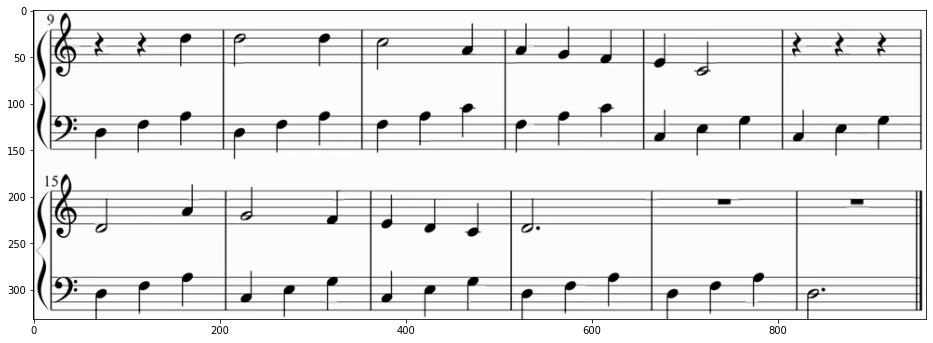

In [4]:
cropped_sheets = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=True)

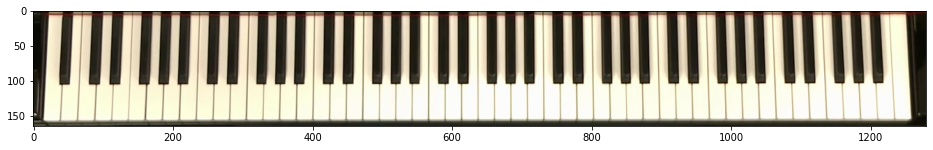

In [5]:
cropped = bfc.crop_frame(frame, 375, 0, 540-375, frame.shape[1], show=True)

# Get notes

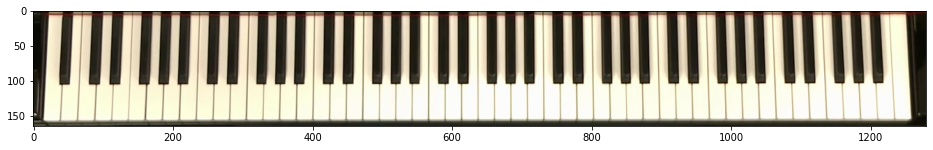

In [6]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
image = bfc.get_frame(cap, 814)[1]
image = bfc.crop_frame(image, 375, 0, 540-375, image.shape[1], show=True)

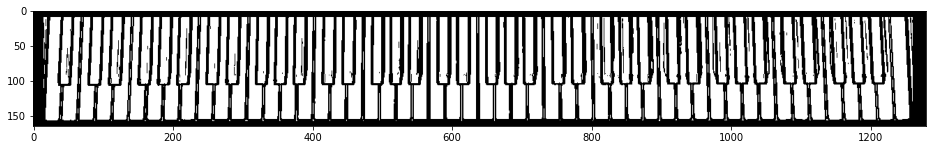

Number of connected components: 88


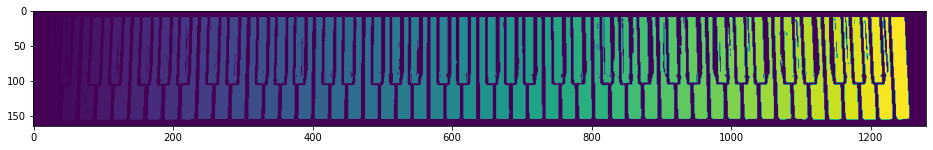

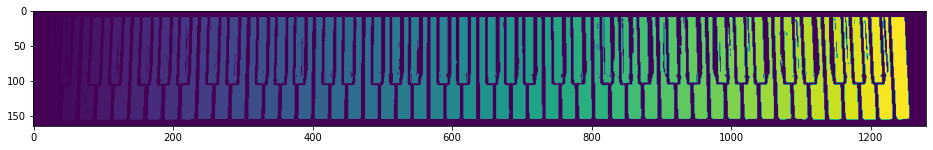

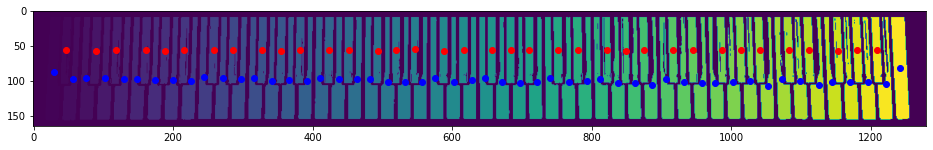

  0%|          | 0/36 [00:00<?, ?it/s]

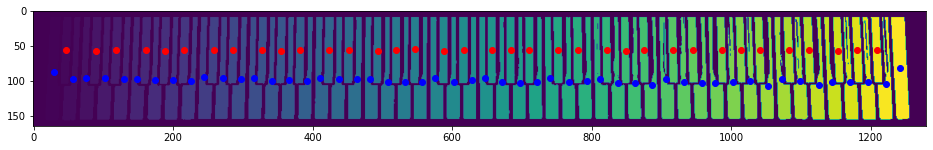

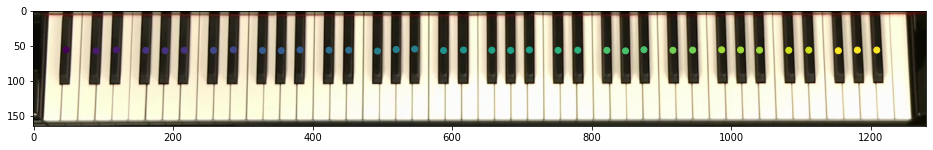

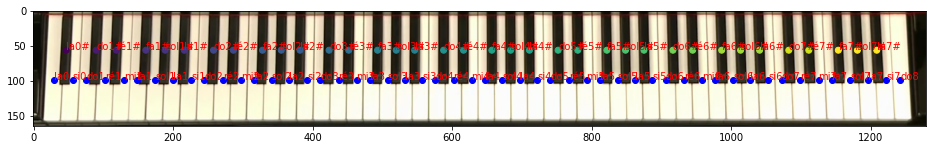

In [7]:
pipe = pkn.pipeline(image, with_hull=True, threshold = 4000, kx=15, crop=[10,7,15,19], min_area=300, max_width=200, show=True)
labels, black_keys, white_keys, n_labels, stats, centroids, group, notes, sobel = pipe

# Hightlight notes from sheet

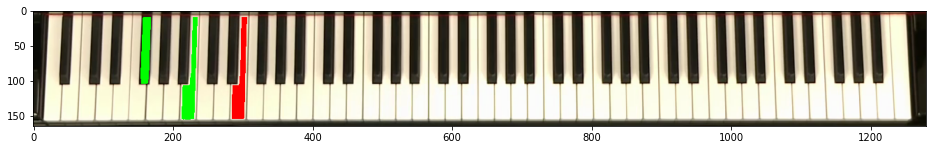

In [8]:
g = [0,255,0]
b = [0,0,255]
r = [255,0,0]
_ = pkn.highlight_keys(image=image, labels=labels, keys = [10,15,20], color = [g,g,r], show=True)

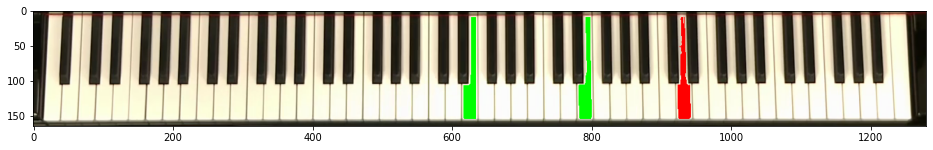

In [9]:
_ = pkn.highlight_notes(image=image, labels=labels, notes = ["mi4", "mi5", "ré6"], dict_notes = notes, color = [g,g,r], show=True)

# Read sheet

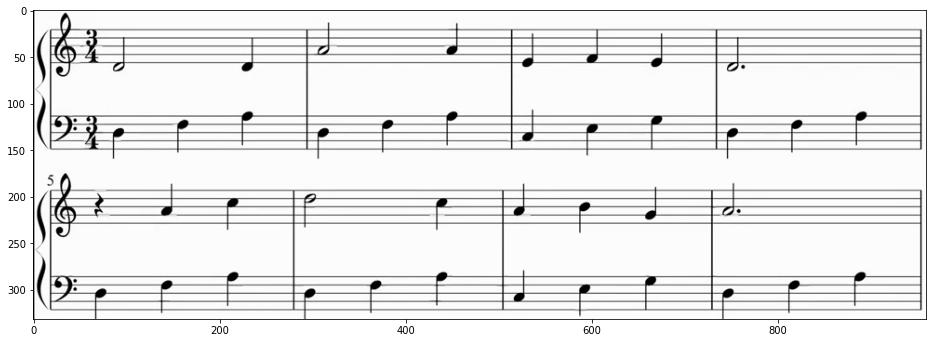

In [10]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
_, frame = bfc.get_frame(cap, 10)
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=True)

## Black notes

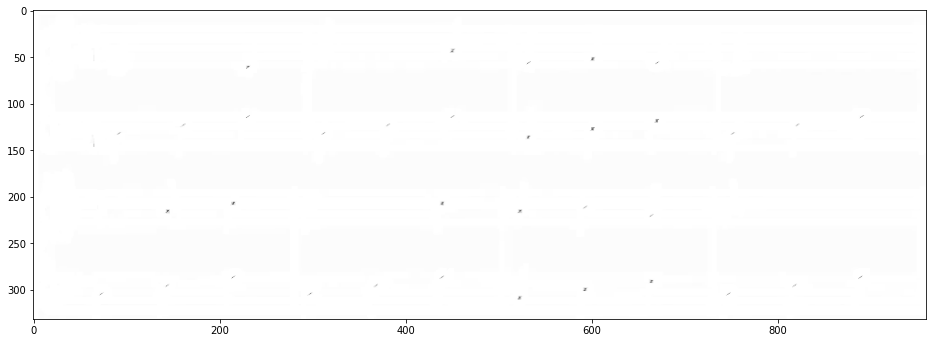

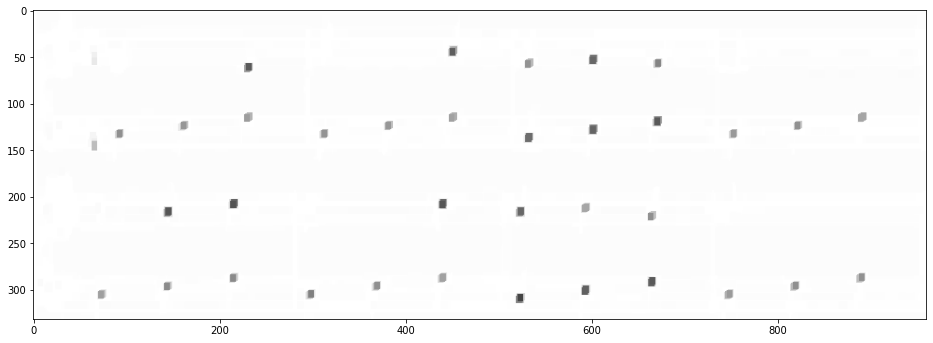

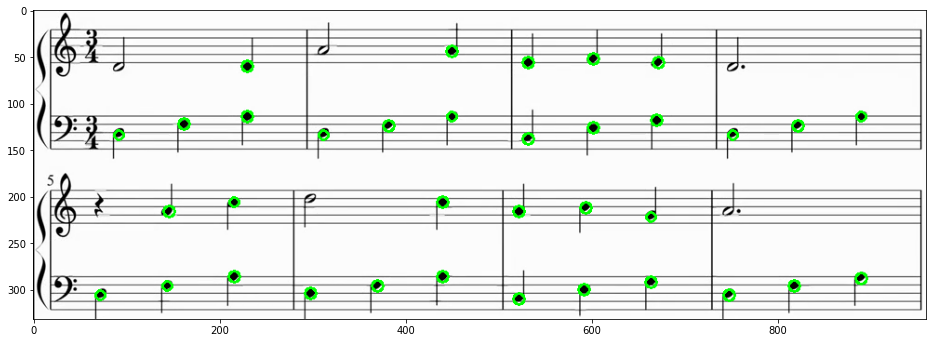

In [11]:
_, frame = bfc.get_frame(cap, 10)
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=False)
_ = sr.get_black_notes(img, show=True)

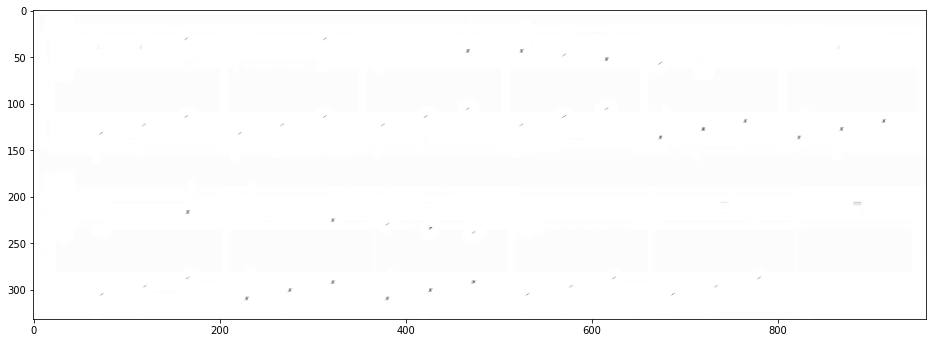

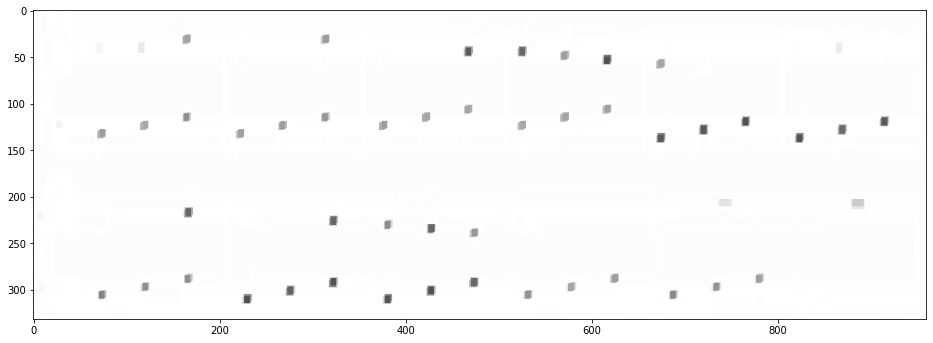

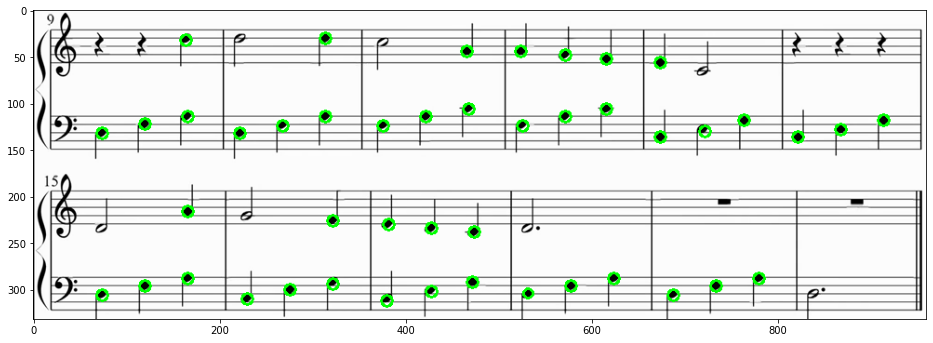

In [12]:
_, frame = bfc.get_frame(cap, 780)
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=False)
_ = sr.get_black_notes(img, show=True)

## White notes

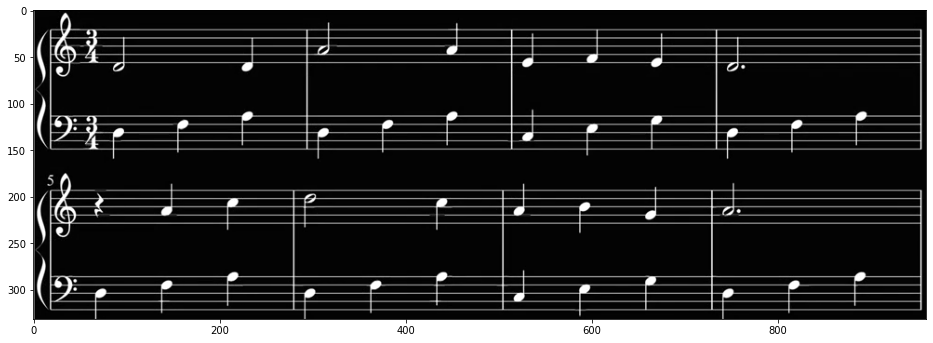

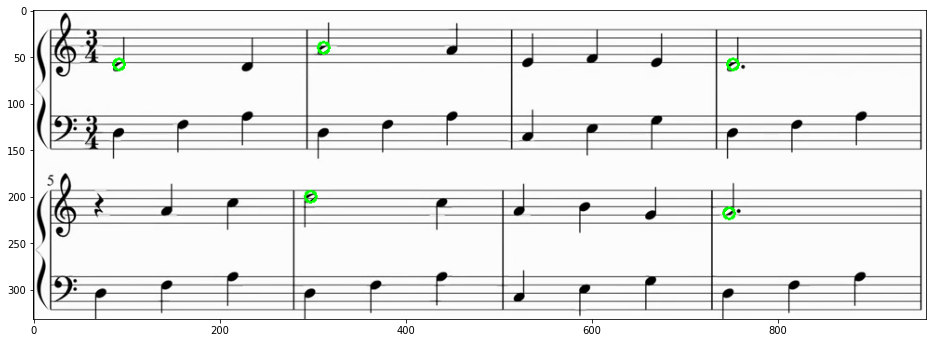

In [13]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
_, frame = bfc.get_frame(cap, 10)
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=False)
_ = sr.get_white_notes(img, dp=1, minDist=20, param1=1000, param2=7, minRadius=6, maxRadius=7, show=True)

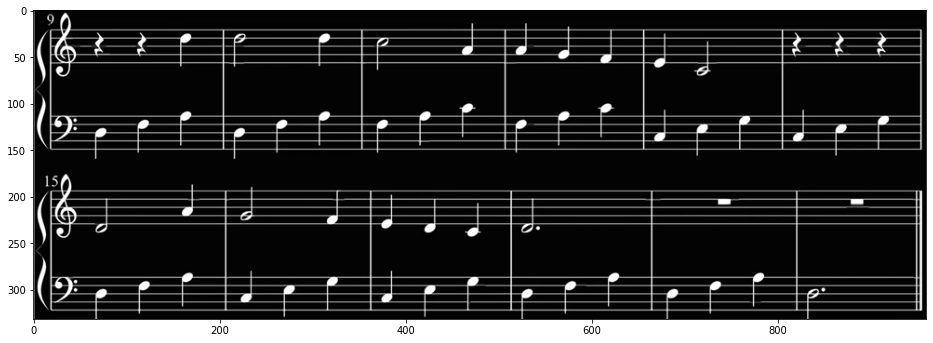

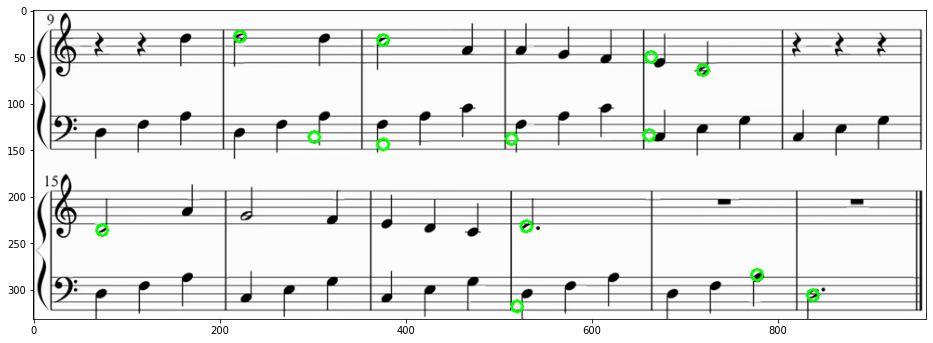

In [14]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
_, frame = bfc.get_frame(cap, 677)
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=False)
_ = sr.get_white_notes(img, dp=1, minDist=20, param1=1000, param2=6, minRadius=6, maxRadius=7,show=True)

## Combine white and black notes

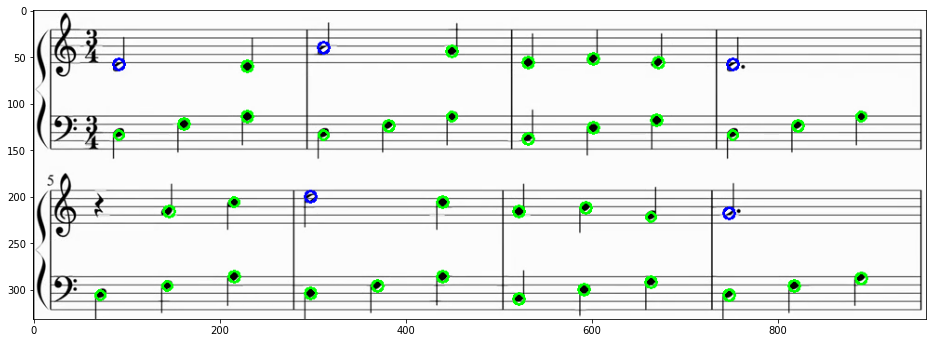

In [15]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
_, frame = bfc.get_frame(cap, 10)
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=False)
black_circles = sr.get_black_notes(img)
white_circles = sr.get_white_notes(img, dp=1, minDist=20, param1=1000, param2=7, minRadius=6, maxRadius=7)
all_circles, black_circles, white_circles = sr.all_notes_circles(img, black_circles, white_circles, min_dist=10, show=True)

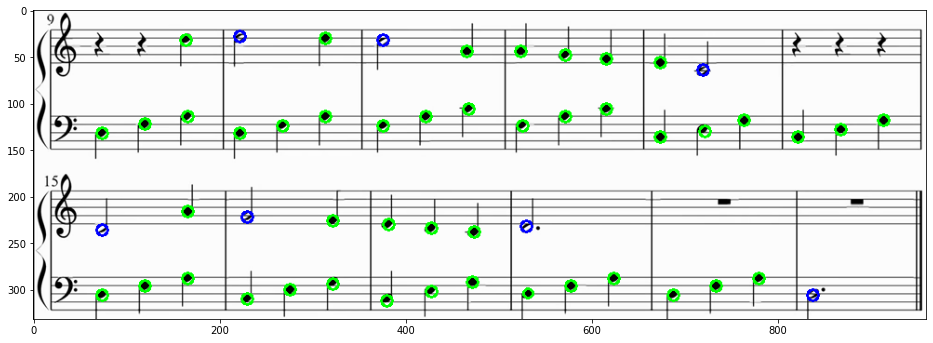

In [16]:
_, frame = bfc.get_frame(cap, 781)
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=False)
black_circles = sr.get_black_notes(img)

_, frame = bfc.get_frame(cap, 677)
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=False)
white_circles1 = sr.get_white_notes(img, dp=1, minDist=20, param1=1000, param2=6, minRadius=6, maxRadius=7)
white_circles2 = sr.get_white_notes(img, dp=1, minDist=20, param1=1000, param2=7, minRadius=6, maxRadius=7)
white_circles = np.concatenate((white_circles1, white_circles2), axis=1)

all_circles, black_circles, white_circles = sr.all_notes_circles(img, black_circles, white_circles, min_dist=30, show=True)

## Find staff

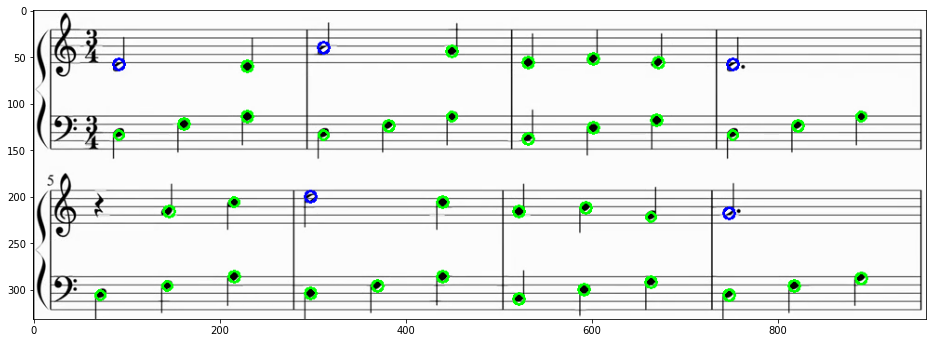

In [17]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
_, frame = bfc.get_frame(cap, 10)
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=False)
black_circles = sr.get_black_notes(img)
white_circles = sr.get_white_notes(img, dp=1, minDist=20, param1=1000, param2=7, minRadius=6, maxRadius=7)
all_circles, black_circles, white_circles = sr.all_notes_circles(img, black_circles, white_circles, min_dist=10, show=True)

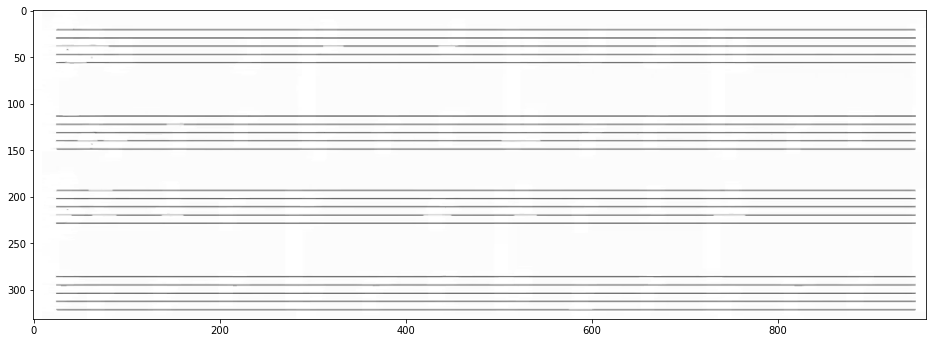

In [18]:
lines_staff = sr.dilate_img(img, kernel_size_x=1, kernel_size_y=15, iterations=1, show = True)

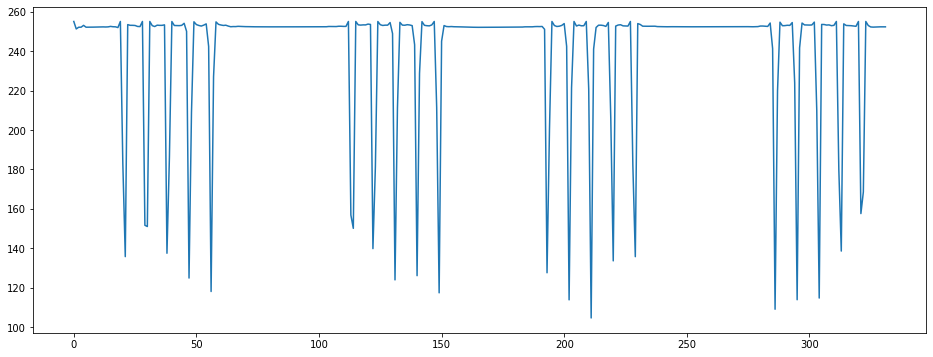

In [19]:
# we want to find the y coordinates of the lines of the staff
y_mean = np.mean(lines_staff, axis=2)
y_mean = np.mean(y_mean, axis=1)
plt.figure(figsize=(16,6))
plt.plot(y_mean)
plt.show()

In [20]:
# index of the lines of the staff are where the y_mean is less 200
index_lines_staff = np.where(y_mean < 200)[0]
index_lines_staff

array([ 20,  21,  29,  30,  38,  39,  47,  56, 113, 114, 122, 123, 131,
       140, 149, 193, 202, 211, 220, 228, 229, 286, 295, 304, 312, 313,
       321, 322])

In [21]:
group_staff = sr.isolate_index(index_lines_staff)
group_staff

[[20, 29, 38, 47, 56],
 [113, 122, 131, 140, 149],
 [193, 202, 211, 220, 229],
 [286, 295, 304, 313, 322]]

## Find notes from staff

In [22]:
circles_group_staff = sr.group_circles_staff(all_circles, group_staff)

In [23]:
circles_group_staff[1]

[array([ 92, 134,   5], dtype=uint16),
 array([162, 122,   6], dtype=uint16),
 array([230, 114,   6], dtype=uint16),
 array([312, 134,   5], dtype=uint16),
 array([382, 124,   6], dtype=uint16),
 array([450, 114,   5], dtype=uint16),
 array([532, 138,   6], dtype=uint16),
 array([602, 126,   6], dtype=uint16),
 array([670, 118,   6], dtype=uint16),
 array([752, 134,   5], dtype=uint16),
 array([822, 124,   6], dtype=uint16),
 array([890, 114,   5], dtype=uint16)]

In [24]:
print(sr.get_notes_names(circles_group_staff[1], sr.get_base_notes_coordinates(group_staff[1]), sr.get_dic(sr.get_base_notes_coordinates(group_staff[1]), False)))

['do3', 'fa3', 'la3', 'do3', 'fa3', 'la3', 'si2', 'mi3', 'sol3', 'do3', 'fa3', 'la3']


## Refining the position of notes

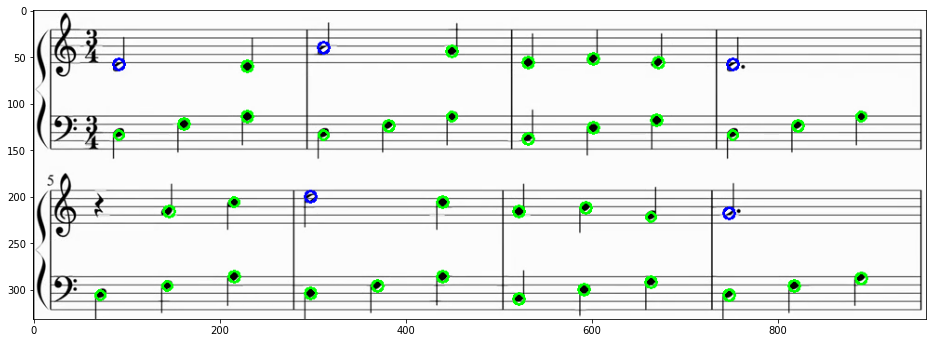

In [25]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
_, frame = bfc.get_frame(cap, 10)
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=False)
black_circles = sr.get_black_notes(img)
white_circles = sr.get_white_notes(img, dp=1, minDist=20, param1=1000, param2=7, minRadius=6, maxRadius=7)
all_circles, black_circles, white_circles = sr.all_notes_circles(img, black_circles, white_circles, min_dist=10, show=True)

### Center of black notes

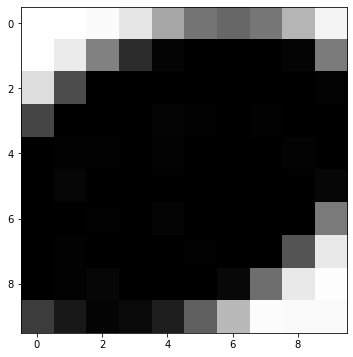

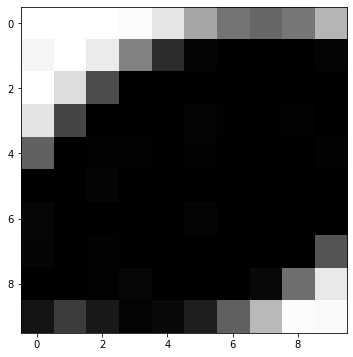

(297, 304)

In [26]:
sr.find_real_black_center(img, (black_circles[0][0][0], black_circles[0][0][1]), show=True)

In [27]:
black_circles_center = []
for circle in black_circles[0]:
    black_circles_center.append(sr.find_real_black_center(img, (circle[0], circle[1])))
black_circles_center = np.array([black_circles_center])

In [28]:
group_black_circles_center = sr.group_circles_staff(black_circles_center, group_staff)

In [29]:
print(sr.get_notes_names(group_black_circles_center[0], sr.get_base_notes_coordinates(group_staff[0]), sr.get_dic(sr.get_base_notes_coordinates(group_staff[0]), True)))
print(sr.get_notes_names(group_black_circles_center[1], sr.get_base_notes_coordinates(group_staff[1]), sr.get_dic(sr.get_base_notes_coordinates(group_staff[1]), False)))
print(sr.get_notes_names(group_black_circles_center[2], sr.get_base_notes_coordinates(group_staff[2]), sr.get_dic(sr.get_base_notes_coordinates(group_staff[2]), True)))
print(sr.get_notes_names(group_black_circles_center[3], sr.get_base_notes_coordinates(group_staff[3]), sr.get_dic(sr.get_base_notes_coordinates(group_staff[3]), False)))

['ré4', 'la4', 'mi4', 'fa4', 'mi4']
['ré3', 'fa3', 'la3', 'ré3', 'fa3', 'la3', 'do3', 'mi3', 'sol3', 'ré3', 'fa3', 'la3']
['la4', 'do5', 'do5', 'la4', 'si4', 'sol4']
['ré3', 'fa3', 'la3', 'ré3', 'fa3', 'la3', 'do3', 'mi3', 'sol3', 'ré3', 'fa3', 'la3']


### Center of white notes

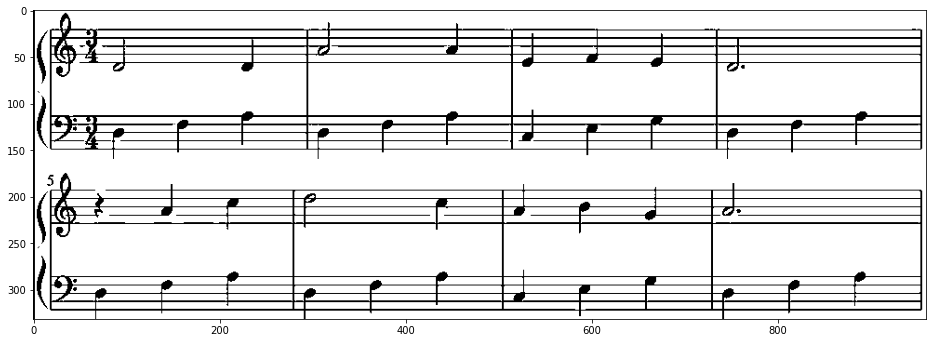

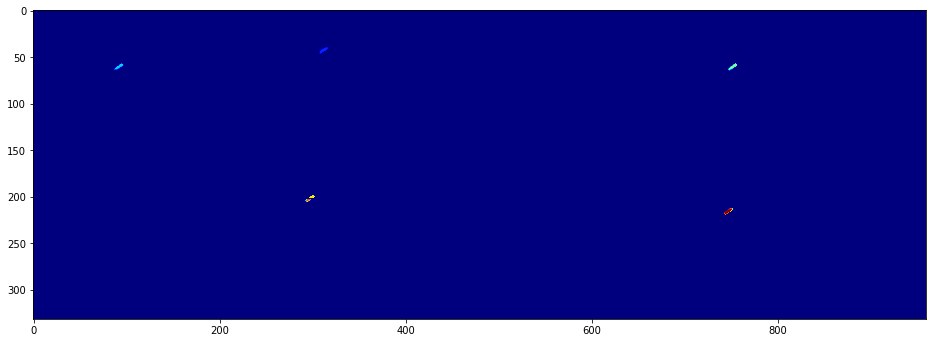

In [30]:
# to find white notes, we should use connected components

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray[img_gray < 180] = 0
img_gray[img_gray >= 180] = 255
plt.figure(figsize=(16,6))
plt.imshow(img_gray, cmap='gray')
plt.show()
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img_gray)
for i in range(1, nb_components):
    if stats[i][4] > 40 or centroids[i][0] < 67:  # remove too big components and those that are too close to the left border
        output[output == i] = 0
output[output > 0] = 255
output = output.astype(np.uint8)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(output)
plt.figure(figsize=(16,6))
plt.imshow(output, cmap='jet')
plt.show()

In [31]:
white_notes_coordinates = sr.find_real_white_center(nb_components, stats, centroids)

In [32]:
group_white_circles_center = sr.group_circles_staff(white_notes_coordinates, group_staff)

In [33]:
print(sr.get_notes_names(group_white_circles_center[0], sr.get_base_notes_coordinates(group_staff[0]), sr.get_dic(sr.get_base_notes_coordinates(group_staff[0]), True)))
print(sr.get_notes_names(group_white_circles_center[2], sr.get_base_notes_coordinates(group_staff[2]), sr.get_dic(sr.get_base_notes_coordinates(group_staff[2]), True)))

['ré4', 'la4', 'ré4']
['ré5', 'la4']


## Combine everything

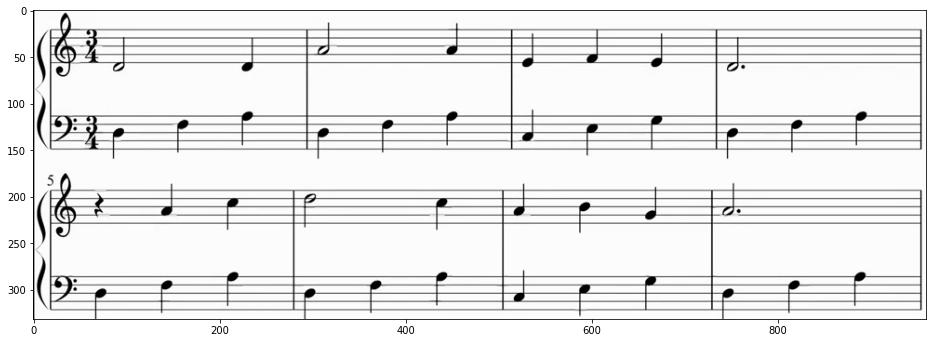

In [34]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
_, frame = bfc.get_frame(cap, 10)
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=True)
lines_staff = sr.dilate_img(img, kernel_size_x=1, kernel_size_y=15, iterations=1, show = False)
y_mean =  np.mean(np.mean(lines_staff, axis=2), axis=1)
index_lines_staff = np.where(y_mean < 200)[0]
group_staff = sr.isolate_index(index_lines_staff)

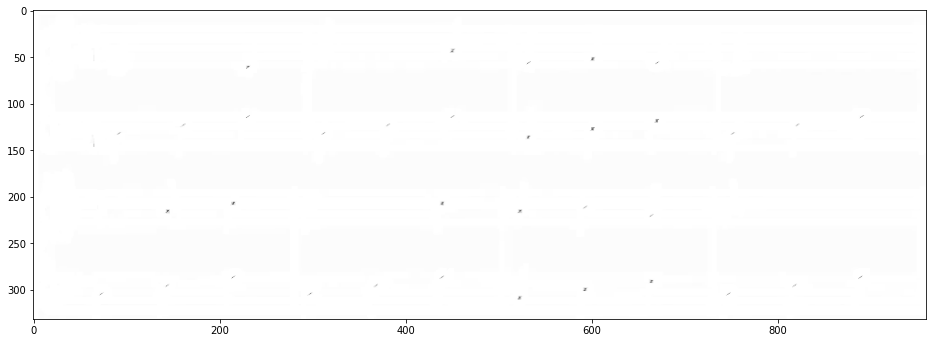

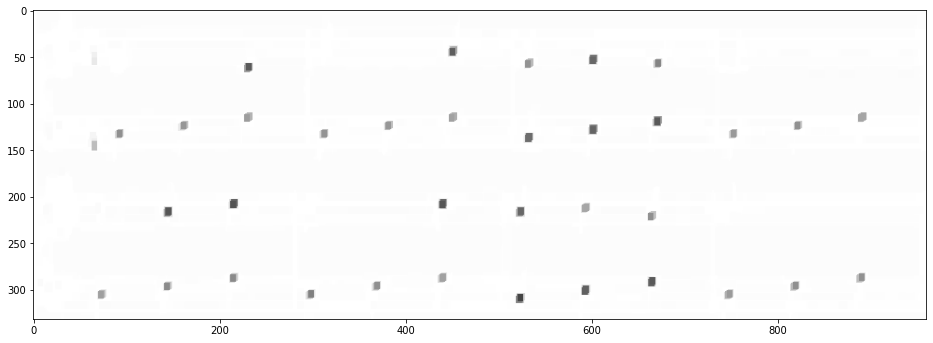

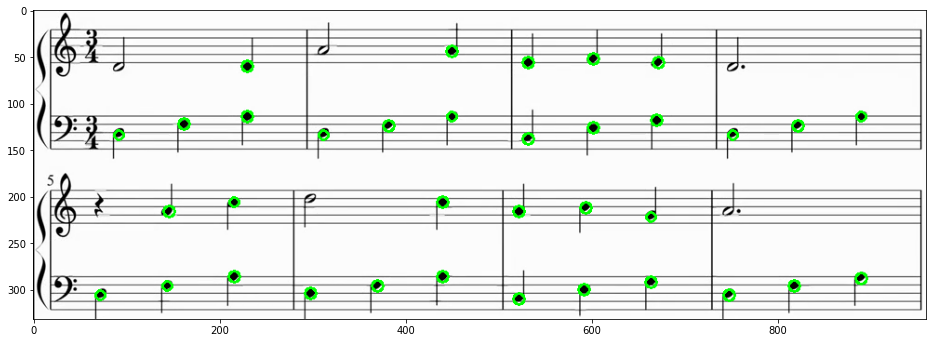

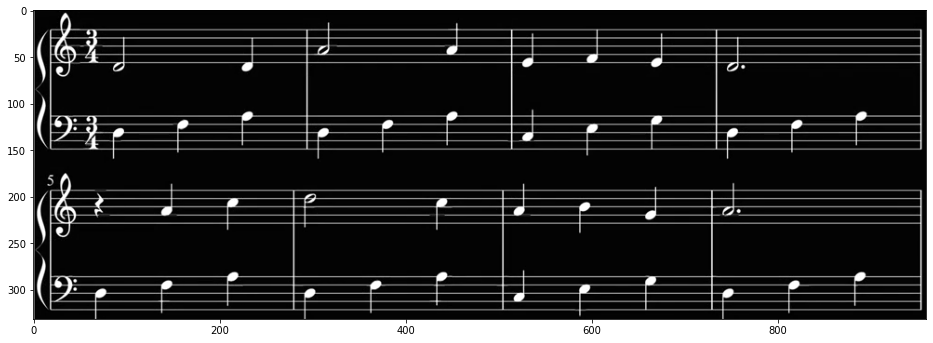

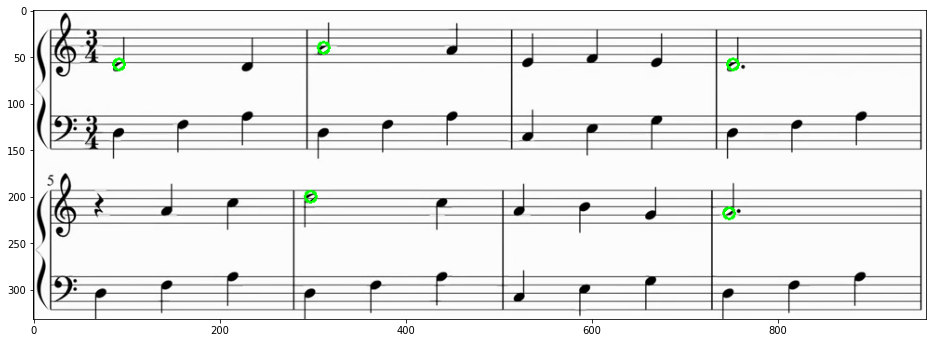

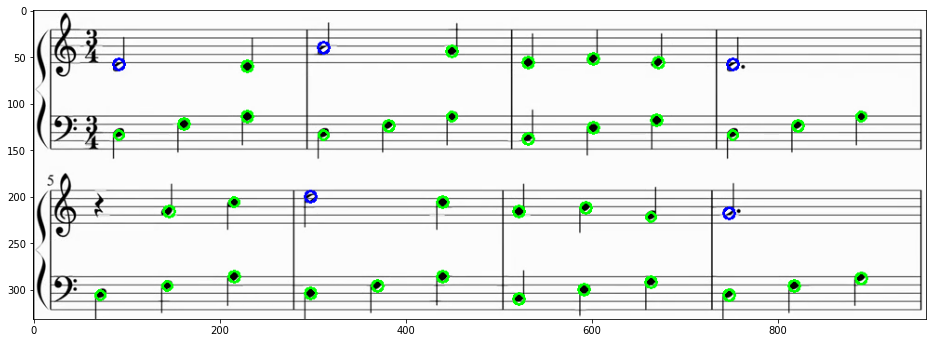

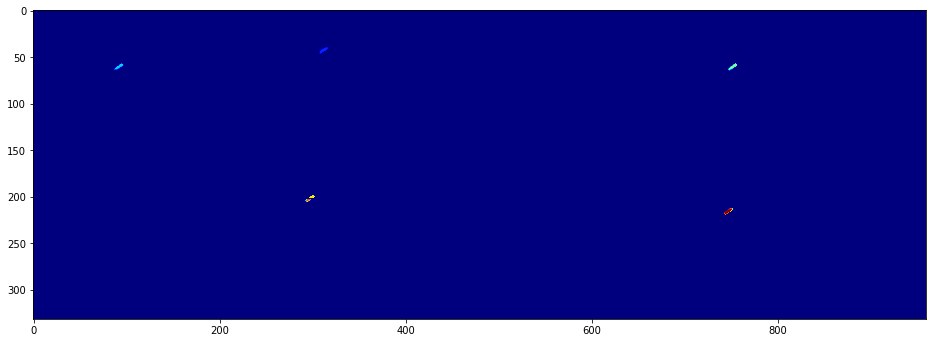

In [35]:
group_circles_center = sr.pipeline_notes_staff(img, group_staff, show=True)

In [36]:
print(sr.circles_to_notes_names(group_circles_center, group_staff))

[['ré4', 'ré4', 'la4', 'la4', 'mi4', 'fa4', 'mi4', 'ré4'], ['ré3', 'fa3', 'la3', 'ré3', 'fa3', 'la3', 'do3', 'mi3', 'sol3', 'ré3', 'fa3', 'la3'], ['la4', 'do5', 'ré5', 'do5', 'la4', 'si4', 'sol4', 'la4'], ['ré3', 'fa3', 'la3', 'ré3', 'fa3', 'la3', 'do3', 'mi3', 'sol3', 'ré3', 'fa3', 'la3']]


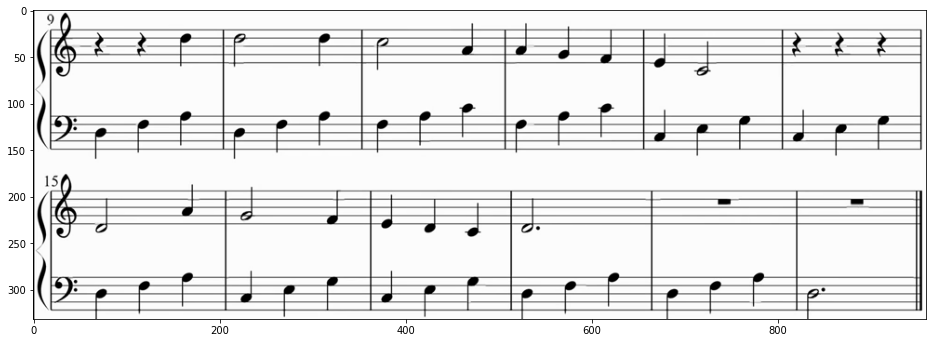

In [37]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')

_, frame = bfc.get_frame(cap, 781)
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=False)

_, frame = bfc.get_frame(cap, 677)
img2 = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=True)

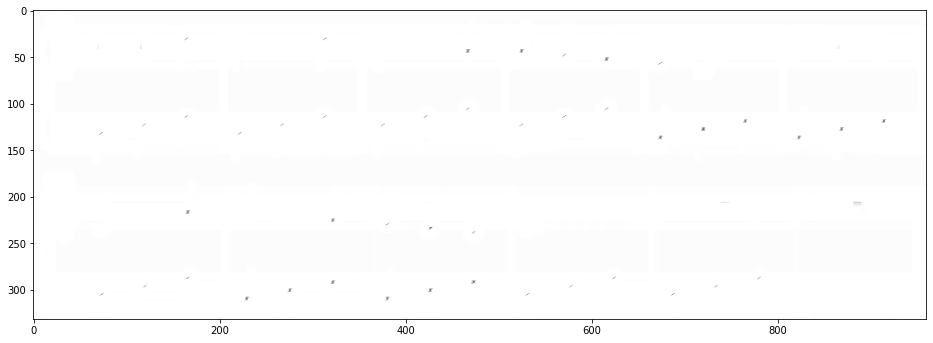

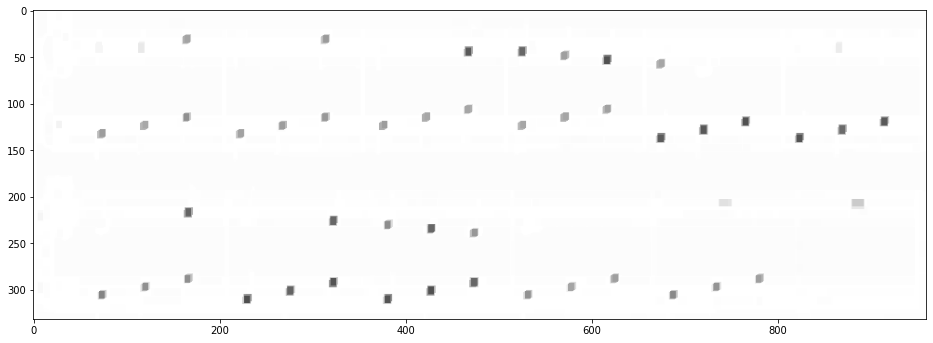

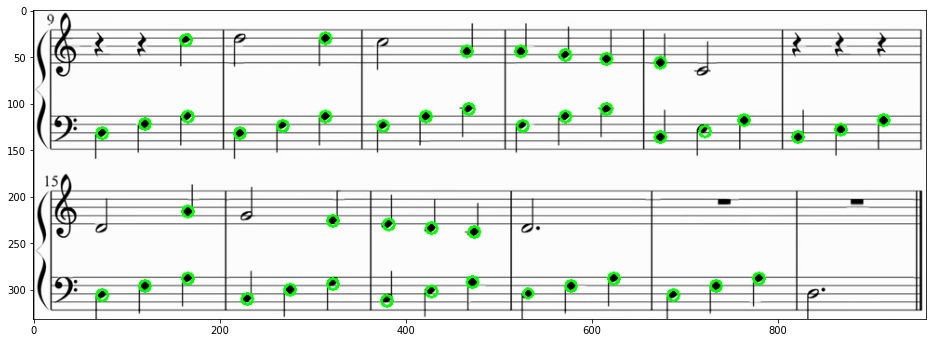

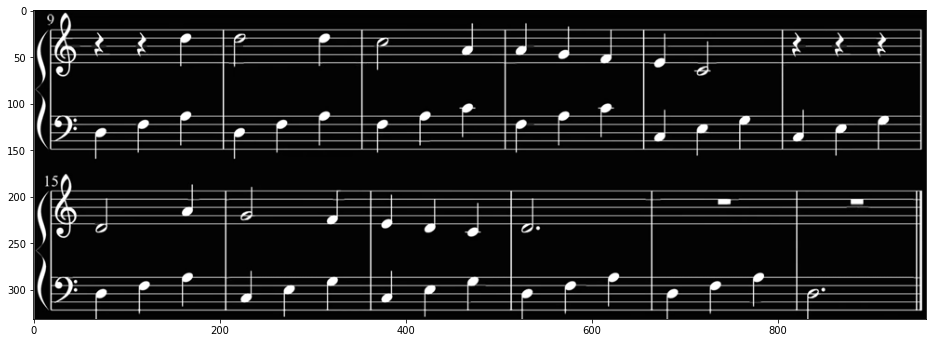

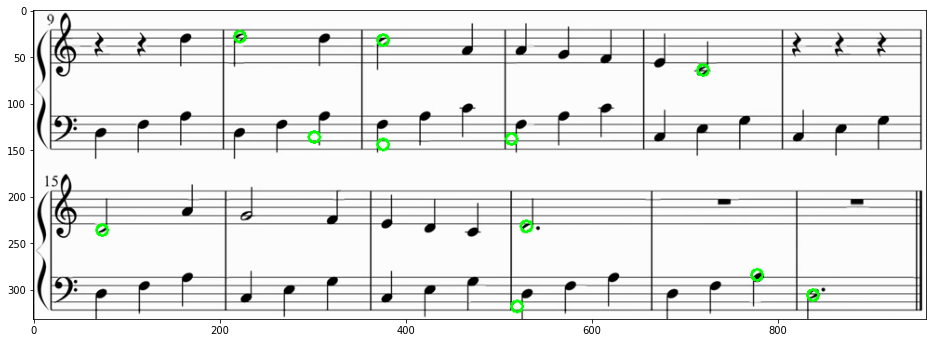

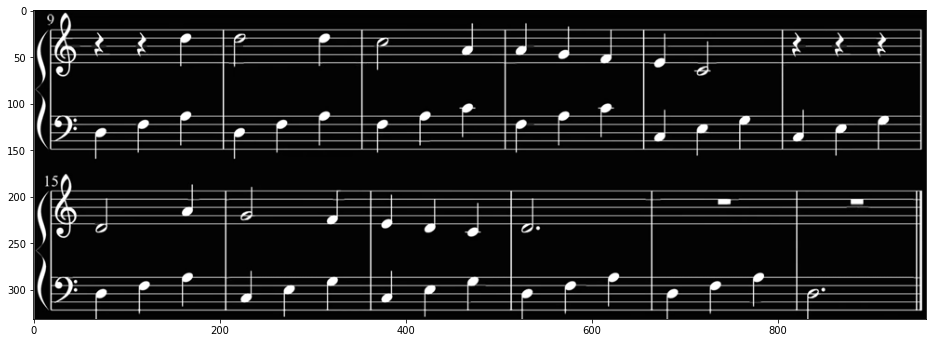

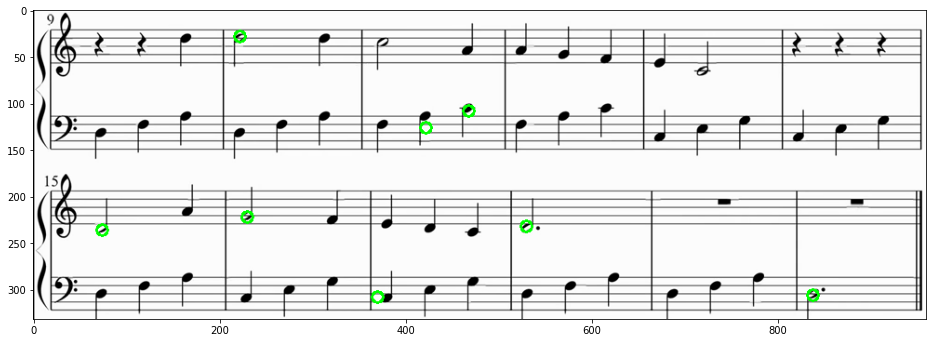

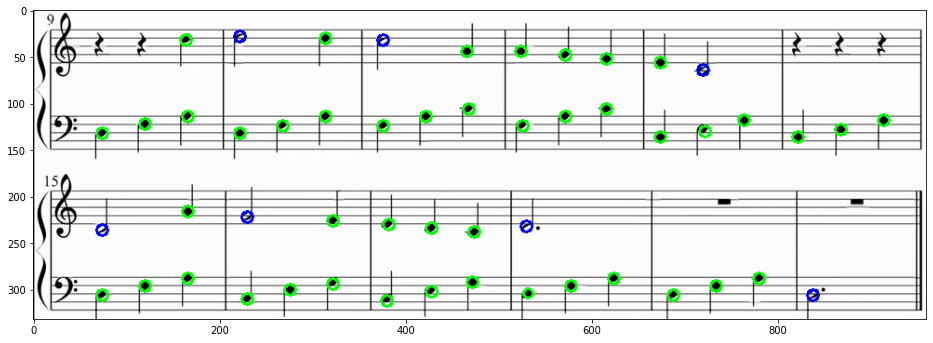

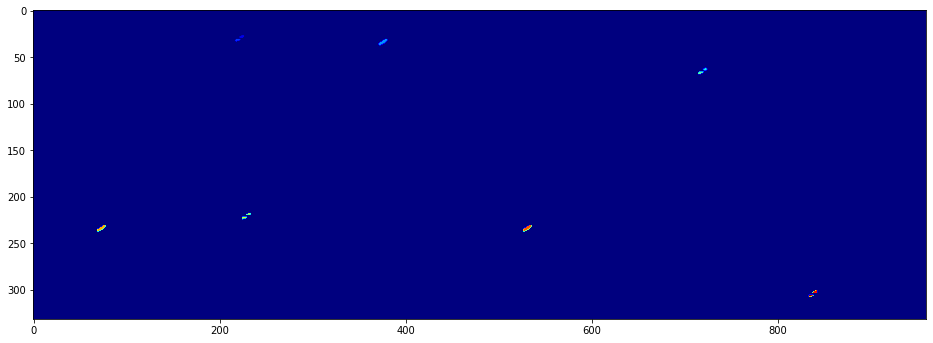

In [38]:
group_circles_center = sr.pipeline_notes_staff(img, group_staff, img2, show=True)

In [39]:
for i in range(len(group_staff)): # group_black_circles_center, group_white_circles_center
    print(sr.get_notes_names(group_circles_center[i], sr.get_base_notes_coordinates(group_staff[i]), sr.get_dic(sr.get_base_notes_coordinates(group_staff[i]), (i % 2 == 0))))

['ré5', 'ré5', 'ré5', 'do5', 'la4', 'la4', 'sol4', 'fa4', 'mi4', 'do4']
['ré3', 'fa3', 'la3', 'ré3', 'fa3', 'la3', 'fa3', 'la3', 'do4', 'fa3', 'la3', 'do4', 'do3', 'mi3', 'sol3', 'do3', 'mi3', 'sol3']
['ré4', 'la4', 'sol4', 'fa4', 'mi4', 'ré4', 'do4', 'ré4']
['ré3', 'fa3', 'la3', 'do3', 'mi3', 'sol3', 'do3', 'mi3', 'sol3', 'ré3', 'fa3', 'la3', 'ré3', 'fa3', 'la3', 'ré3']


# Now the tempo

## Nombre de mesures

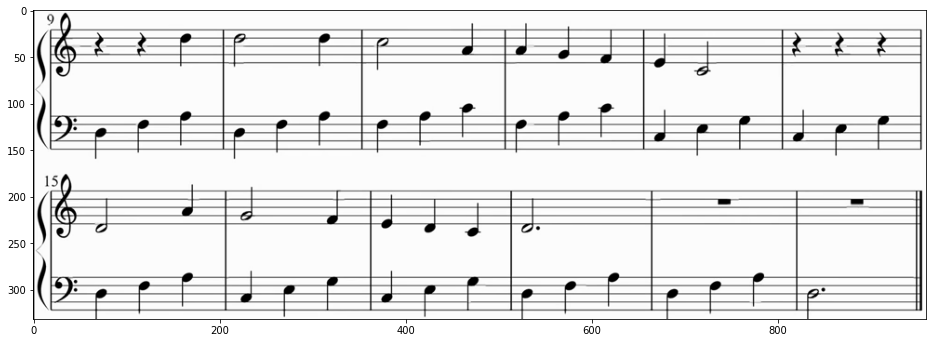

In [40]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
_, frame = bfc.get_frame(cap, 677) # 10,677, 781
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=True)

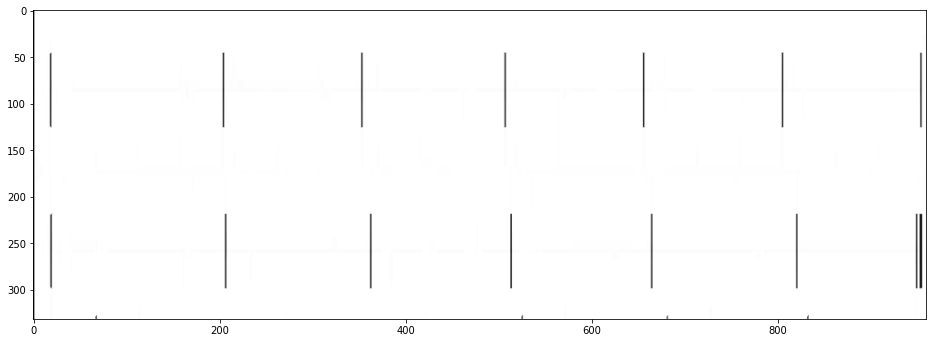

In [41]:
dilated_img = sr.dilate_img(img, kernel_size_x=50, kernel_size_y=1, iterations=1, show = True)

In [42]:
x_mean1 =  np.mean(np.mean(dilated_img[:175,], axis=2), axis=0) # first two staff
index_mesure1 = [x for x in np.where(x_mean1 < 200)[0] if 30 < x < 940]
x_mean2 =  np.mean(np.mean(dilated_img[175:,], axis=2), axis=0) # third and fourth staff
index_mesure2 = [x for x in np.where(x_mean2 < 200)[0] if 30 < x < 940]
# sometimes, x and x+1 are both < 200, so we need to remove the duplicates 
index_mesure1 = [x for x in index_mesure1 if x+1 not in index_mesure1]
index_mesure2 = [x for x in index_mesure2 if x+1 not in index_mesure2]
index_mesure1, index_mesure2

([204, 353, 507, 656, 805], [207, 363, 514, 665, 821])

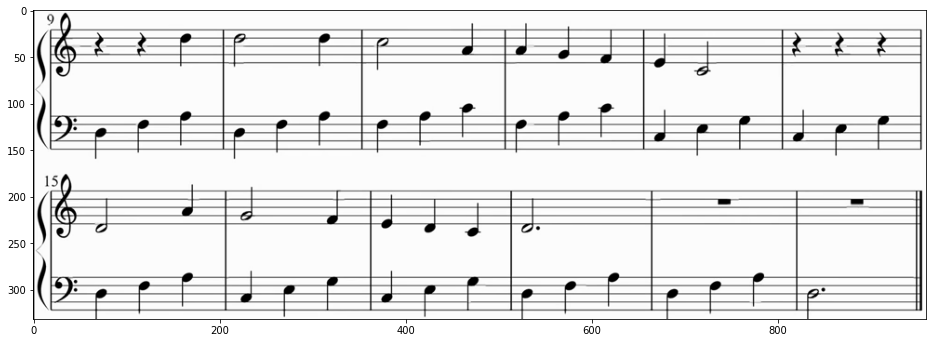

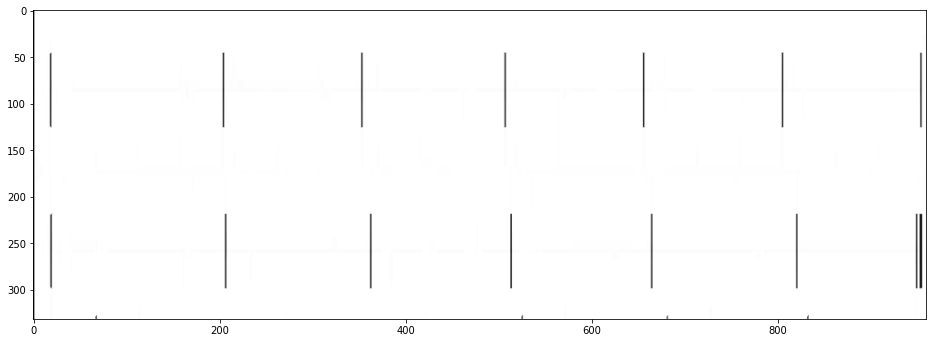

In [43]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
_, frame = bfc.get_frame(cap, 677) # 10,677, 781
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=True)
index_mesure1, index_mesure2 = sr.pipeline_number_mesure(img, show=True)

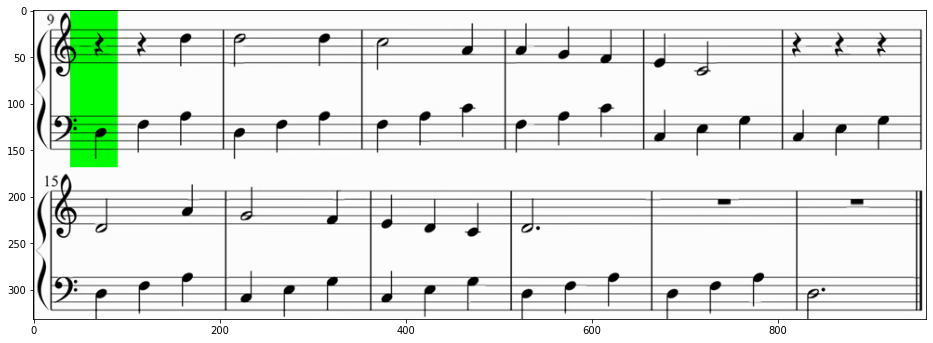

In [44]:
sr.highlight_beat(img, 1, 1, index_mesure1, group_staff)

## Locations of notes

In [45]:
# we want to know where the notes are (which measure and wich staff and especially at what beat (here, 3/4 is the time signature))

cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
_, frame = bfc.get_frame(cap, 781) # 10,677, 781
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=False)
_, frame = bfc.get_frame(cap, 677)
img2 = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=False)
group_circles_center = sr.pipeline_notes_staff(img, img2, show=False)
index_mesure1, index_mesure2 = sr.pipeline_number_mesure(img, show=False)

In [46]:
group_beat = sr.transform_to_beat(group_circles_center, index_mesure1, index_mesure2)

# EACH BEAT SHEET AND PIANO

In [2]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')

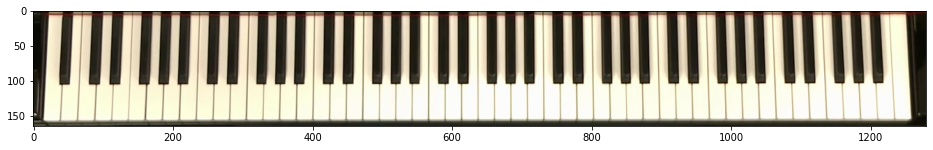

In [48]:
piano = bfc.get_frame(cap, 814)[1]
piano = bfc.crop_frame(piano, 375, 0, 540-375, piano.shape[1], show=True)

Number of connected components: 88


  0%|          | 0/36 [00:00<?, ?it/s]

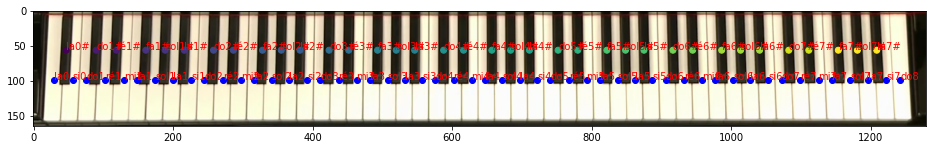

In [49]:
pipe = pkn.pipeline(piano, with_hull=True, threshold = 4000, kx=15, crop=[10,7,15,19], min_area=300, max_width=200, show=[0,0,0,0,0,0,1])
labels, black_keys, white_keys, n_labels, stats, centroids, group, notes, sobel = pipe

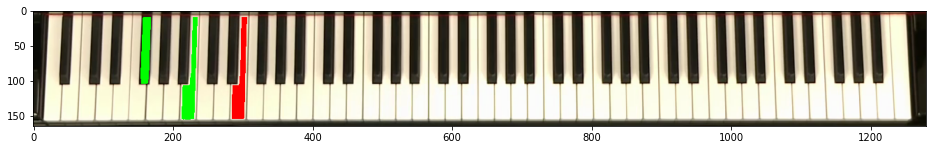

In [50]:
g = [0,255,0]
b = [0,0,255]
r = [255,0,0]
_ = pkn.highlight_keys(image=piano, labels=labels, keys = [10,15,20], color = [g,g,r], show=True)

In [51]:
_, frame = bfc.get_frame(cap, 10)
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=False)
lines_staff = sr.dilate_img(img, kernel_size_x=1, kernel_size_y=15, iterations=1, show = False)
y_mean =  np.mean(np.mean(lines_staff, axis=2), axis=1)
index_lines_staff = np.where(y_mean < 200)[0]
group_staff = sr.isolate_index(index_lines_staff)

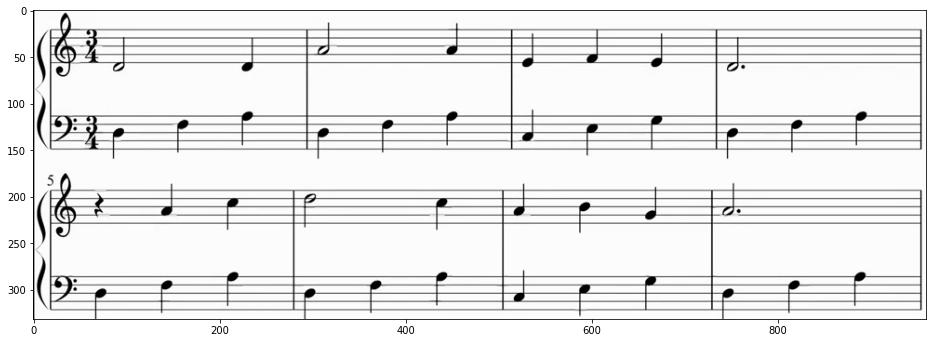

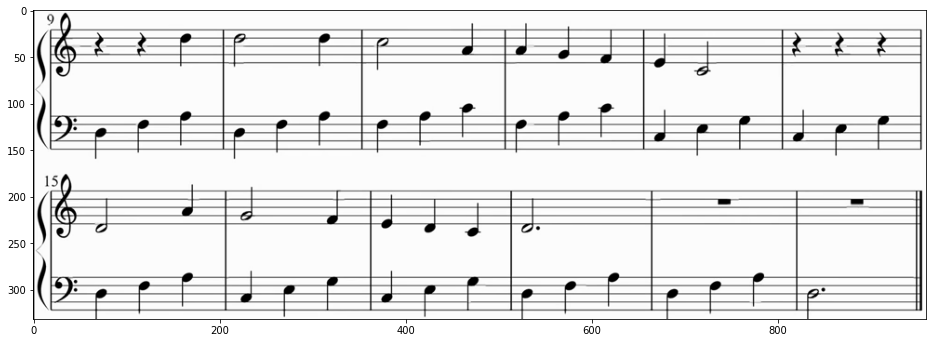

In [52]:
_, frame = bfc.get_frame(cap, 10)
img = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=True)
sheet1 = sr.pipeline_notes_staff(img, group_staff, show=False)
index_mesure1a, index_mesure1b = sr.pipeline_number_mesure(img, show=False)
group_beat1 = sr.transform_to_beat(sheet1, index_mesure1a, index_mesure1b)
note_names1 = sr.circles_to_notes_names(sheet1, group_staff)

_, frame = bfc.get_frame(cap, 781)
img1 = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=False)
_, frame = bfc.get_frame(cap, 677)
img2 = bfc.crop_frame(frame, 8, 158, 340-8, 960, show=True)
sheet2 = sr.pipeline_notes_staff(img1, group_staff, img2, show=False)
index_mesure2a, index_mesure2b = sr.pipeline_number_mesure(img1, show=False)
group_beat2 = sr.transform_to_beat(sheet2, index_mesure2a, index_mesure2b)
note_names2 = sr.circles_to_notes_names(sheet2, group_staff)

In [53]:
index_mesures = [index_mesure1a, index_mesure1b, index_mesure2a, index_mesure2b]
groups_beat = [group_beat1, group_beat2]
notes_names = [note_names1, note_names2]
imgs = [img, img1]
total_mesures = sum([len(x)-1 for x in index_mesures])
total_beats = total_mesures * 3

In [54]:
def show_sheet(beat):
    beat_in_mesure, beat_in_sheet, index_mesure, staff, image, group_beat, note_names = sr.beat_to_infos(beat, index_mesures, group_staff, imgs, groups_beat, notes_names)
    notes_at_beat = sr.notes_in_beat(note_names, group_beat, beat_in_sheet//3+1, beat_in_mesure)
    print(notes_at_beat)
    sr.highlight_beat(image, beat_in_sheet//3+1, beat_in_mesure, index_mesure, staff)
    _ = pkn.highlight_notes(image=piano, labels=labels, notes = notes_at_beat[0]+notes_at_beat[1],
                            dict_notes = notes, color = [g,g,r], show=True)
    

interact(show_sheet, beat=(1, total_beats, 1))

interactive(children=(IntSlider(value=30, description='beat', max=60, min=1), Output()), _dom_classes=('widget…

<function __main__.show_sheet(beat)>